In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mutual_info_score
import statsmodels.api as sm
from scipy.stats import fisher_exact

In [9]:
path = '../PDproj/cellresults/ttest/withGF/ALPHA0.05MINVAR0.000/ALL/unpruned/'
filenames = [line.rstrip() for line in open(path +'filenames.txt')]
filenames

['cellshilicneg_ALL_ALPHA0.05MINVAR0.000.csv',
 'cellshilicpos_ALL_ALPHA0.05MINVAR0.000.csv',
 'cellslipidneg_ALL_ALPHA0.05MINVAR0.000.csv',
 'cellslipidpos_ALL_ALPHA0.05MINVAR0.000.csv',
 'cellsRPneg_ALL_ALPHA0.05MINVAR0.000.csv',
 'cellsRPpos_ALL_ALPHA0.05MINVAR0.000.csv',
 'mediumhilicneg_ALL_ALPHA0.05MINVAR0.000.csv',
 'mediumhilicpos_ALL_ALPHA0.05MINVAR0.000.csv',
 'mediumRPneg_ALL_ALPHA0.05MINVAR0.000.csv',
 'mediumRPpos_ALL_ALPHA0.05MINVAR0.000.csv']

In [2]:
path = '../PDproj/cellresults/ttest/withGF/ALPHA0.05MINVAR0.000/ALL/pruned/'
filenames = [line.rstrip() for line in open(path +'filenames.txt')]
filenames

['cellshilicneg_ALL_ALPHA0.05MINVAR0.000.csv',
 'cellshilicpos_ALL_ALPHA0.05MINVAR0.000.csv',
 'cellslipidneg_ALL_ALPHA0.05MINVAR0.000.csv',
 'cellslipidpos_ALL_ALPHA0.05MINVAR0.000.csv',
 'cellsRPneg_ALL_ALPHA0.05MINVAR0.000.csv',
 'cellsRPpos_ALL_ALPHA0.05MINVAR0.000.csv',
 'mediumhilicneg_ALL_ALPHA0.05MINVAR0.000.csv',
 'mediumhilicpos_ALL_ALPHA0.05MINVAR0.000.csv',
 'mediumRPneg_ALL_ALPHA0.05MINVAR0.000.csv',
 'mediumRPpos_ALL_ALPHA0.05MINVAR0.000.csv']

In [11]:
lim=10
filenum = 2
fname = filenames[filenum]
data = pd.read_csv(path + fname,sep=';')
data[' significant'] = data[' p_FDR']<0.05
S = data[' significant'].to_numpy(dtype=bool)
UR = (data[' mv1'] + data[' mv2'] > lim).to_numpy(dtype=bool)
print(fname)

cellslipidneg_ALL_ALPHA0.05MINVAR0.000.csv


In [14]:
data[' masstime'].to_numpy()[np.where(UR)[0]]

array(['1261.81555@16.085', '1261.81555@16.085', '1261.81555@16.085',
       '1399.80566@17.726', '1261.81555@16.085', '1233.78384@15.494',
       '889.58178@15.739', '1233.78384@15.494', '666.60469@19.201',
       '666.60469@19.201', '666.60469@19.201', '1291.86188@18.662',
       '1233.78384@15.494', '554.479@14.874', '1333.83398@18.057',
       '1287.83064@16.762', '1519.12313@14.645', '612.55758@18.148',
       '808.55044@14.605', '612.55758@18.148', '652.51403@16.887',
       '612.55758@18.148', '808.55044@14.605', '1333.83398@18.057',
       '1287.83064@16.762', '505.35076@14.023', '1519.12313@14.645',
       '728.52429@15.862', '555.38426@15.8', '555.38426@15.8',
       '678.52924@17.69', '728.52429@15.862', '731.56039@16.493',
       '742.50177@16.055', '728.52429@15.862', '742.50111@16.049',
       '555.38426@15.8', '1446.12705@17.111', '742.50177@16.055',
       '742.50111@16.049', '555.38426@15.8', '706.48578@16.986',
       '688.52921@16.701', '688.52921@16.701', '706.48584

In [ ]:
for filenum in range(10):
    print("##########################################")
    fname = filenames[filenum]
    data = pd.read_csv(path + fname,sep=';')
    data[' significant'] = data[' p_FDR']<0.05
    S = data[' significant'].to_numpy(dtype=bool)
    UR = (data[' mv1'] + data[' mv2'] >= 6).to_numpy(dtype=bool)

In [7]:
for filenum in range(10):
    print("##########################################")
    fname = filenames[filenum]
    data = pd.read_csv(path + fname,sep=';')
    data[' significant'] = data[' p_FDR']<0.05
    S = data[' significant'].to_numpy(dtype=bool)
    UR = (data[' mv1'] + data[' mv2'] >= 6).to_numpy(dtype=bool)
    #UR&=  (data[' mv1']<8).to_numpy(dtype=bool)
    #UR&= (data[' mv2']<8).to_numpy(dtype=bool)
    print(fname)

    n_URandS = np.sum(S & UR)
    n_UR = np.sum(UR)
    n_S = np.sum(S)
    n = len(S)
    p_SgivenUR = n_URandS / n_S
    p_URgivenS =  n_URandS / n_UR
    leverage = n_URandS/n - n_S*n_UR/n**2
    lift = n*n_URandS/(n_S*n_UR)
    print("n: {}\nn_UR: {}\nn_S: {}\nn_URandS: {}".format(n,n_UR,n_S, n_URandS))
    print("\nConfidence: ",np.max([p_SgivenUR,p_URgivenS]))
    print("leverage:",leverage)
    print("lift:",lift)
    try:
        p = fisher_exact(pd.crosstab(S,UR))[1]
        #print("number of duplicates:",np.sum(data[' duplicate']))
        print("Fisher's p:",p)
        if p<0.05:
            print("Significant")
    except:
        continue
                

##########################################
cellshilicneg_ALL_ALPHA0.05MINVAR0.000.csv
n: 786
n_UR: 86
n_S: 23
n_URandS: 0

Confidence:  0.0
leverage: -0.0032017041223963896
lift: 0.0
Fisher's p: 0.1628547685478804
##########################################
cellshilicpos_ALL_ALPHA0.05MINVAR0.000.csv
n: 3036
n_UR: 446
n_S: 224
n_URandS: 31

Confidence:  0.13839285714285715
leverage: -0.0006279498889913051
lift: 0.9420643818065343
Fisher's p: 0.769100677228282
##########################################
cellslipidneg_ALL_ALPHA0.05MINVAR0.000.csv
n: 6810
n_UR: 910
n_S: 1747
n_URandS: 244

Confidence:  0.2681318681318681
leverage: 0.0015497206535262792
lift: 1.0452077973543343
Fisher's p: 0.3919720931874059
##########################################
cellslipidpos_ALL_ALPHA0.05MINVAR0.000.csv
n: 13302
n_UR: 2506
n_S: 1515
n_URandS: 322

Confidence:  0.21254125412541255
leverage: 0.0027503401599984593
lift: 1.1281818684661762
Fisher's p: 0.011943137886295706
Significant
#######################

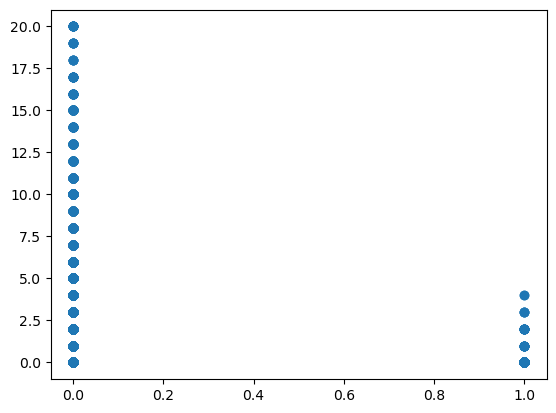

In [214]:
plt.scatter(data[' duplicate'], data[' mv1'] + data[' mv2'])

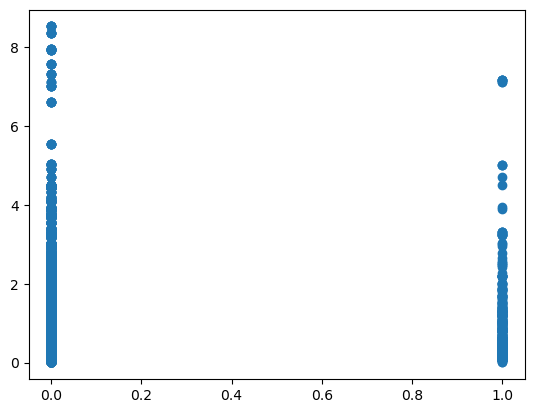

In [215]:
plt.scatter(data[' duplicate'], data[' var'])

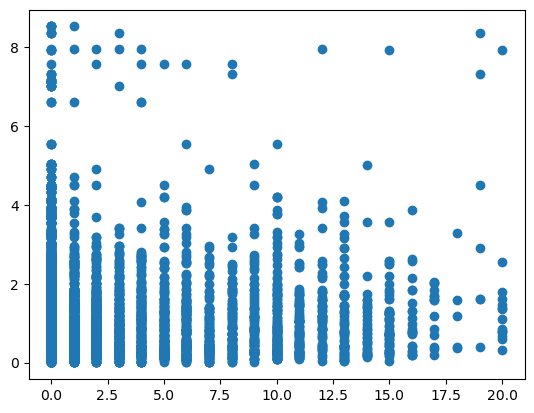

In [216]:
plt.scatter(data[' mv1'] + data[' mv2'], data[' var'])

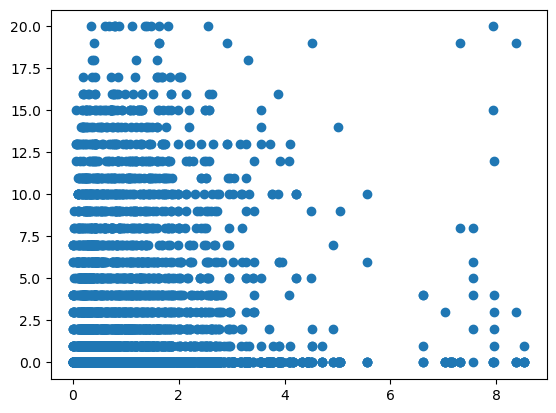

In [217]:
plt.scatter(data[' var'],data[' mv1'] + data[' mv2'])

In [361]:
import numpy as np
from scipy.stats import chi2

In [392]:
it=1000
varest=np.zeros((it,))
for i in range(it):
    varest[i]=np.var(np.random.normal(0,1,10))


(array([118., 250., 265., 200.,  98.,  35.,  22.,   6.,   3.,   3.]),
 array([0.1502864 , 0.44392181, 0.73755723, 1.03119264, 1.32482805,
        1.61846346, 1.91209888, 2.20573429, 2.4993697 , 2.79300511,
        3.08664053]),
 <BarContainer object of 10 artists>)

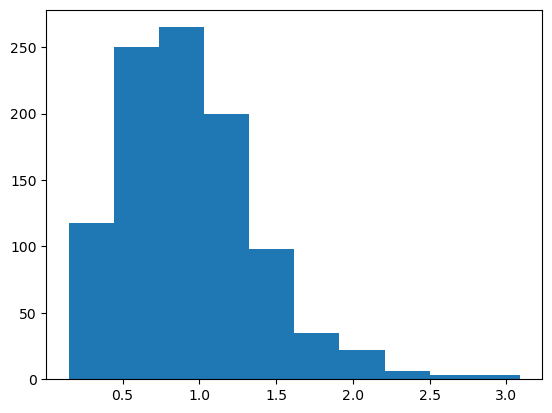

In [393]:
plt.hist(varest)

In [365]:
np.random.normal(0,1,10)

array([ 0.41490103, -1.64811876,  0.69387984, -0.54515341, -0.70635931,
       -0.42441974,  0.64035036, -0.44828716, -0.85816944,  0.10618478])